In [2]:
import warnings; 
warnings.simplefilter('ignore')

In [3]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

# 0. Installer og importer pandas og fbprophet

In [4]:
!pip3 install pystan==2.17.1.0

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [5]:
!pip3 install fbprophet

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# 1. Indlæs og forbered data

In [7]:
df = pd.read_csv('NewDateML.csv')

In [8]:
df.dtypes

Date       object
Segment    object
Product    object
 Sales      int64
dtype: object

In [9]:
df['ds'] = pd.DatetimeIndex(df['Date'])

In [10]:
df.head()

,Date,Segment,Product,Sales,ds
0,2013-09-01,Government,Paseo,11950,2013-09-01
1,2013-09-01,Government,Paseo,15621,2013-09-01
2,2013-09-01,Government,Paseo,6712,2013-09-01
3,2013-09-01,Government,Paseo,15514,2013-09-01
4,2013-09-01,Government,Paseo,2367,2013-09-01


In [11]:
df.drop(['Date', 'Segment', 'Product'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [13]:
df.head(100)

,y,ds
0,11950,2013-09-01
1,15621,2013-09-01
2,6712,2013-09-01
3,15514,2013-09-01
4,2367,2013-09-01
...,...,...
83,50597,2014-12-01
84,438564,2014-12-01
85,21701,2014-12-01
86,26946,2014-12-01


# 2. Træn modellen

In [14]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -98.0156
Iteration  1. Log joint probability =    64.3758. Improved by 162.391.
Iteration  2. Log joint probability =     104.61. Improved by 40.2341.
Iteration  3. Log joint probability =    117.362. Improved by 12.7518.
Iteration  4. Log joint probability =    117.494. Improved by 0.132771.
Iteration  5. Log joint probability =    117.587. Improved by 0.0928554.
Iteration  6. Log joint probability =      117.7. Improved by 0.112592.
Iteration  7. Log joint probability =    117.733. Improved by 0.0333744.
Iteration  8. Log joint probability =    117.742. Improved by 0.00872717.
Iteration  9. Log joint probability =    117.743. Improved by 0.00113222.
Iteration 10. Log joint probability =    117.744. Improved by 0.000548425.
Iteration 11. Log joint probability =    117.744. Improved by 0.000403824.
Iteration 12. Log joint probability =    117.745. Improved by 0.000930572.
Iteration 13. Log joint probability =    117.745. Improved by 0.000219663.
Iterati

In [15]:
df.tail()

,y,ds
83,50597,2014-12-01
84,438564,2014-12-01
85,21701,2014-12-01
86,26946,2014-12-01
87,4981,2014-12-01


# 3. Lav forudsigelser

In [21]:
future = m.make_future_dataframe(periods=10,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-09-01,185500.966781,-357032.472815,385963.747705,185500.966781,185500.966781,-174868.271928,-174868.271928,-174868.271928,-174868.271928,-174868.271928,-174868.271928,0.0,0.0,0.0,10632.694854
1,2013-10-01,182200.296298,-235211.124718,478769.655991,182200.296298,182200.296298,-68992.191172,-68992.191172,-68992.191172,-68992.191172,-68992.191172,-68992.191172,0.0,0.0,0.0,113208.105126
2,2013-11-01,178789.603450,263860.076819,973425.982504,178789.603450,178789.603450,441538.579479,441538.579479,441538.579479,441538.579479,441538.579479,441538.579479,0.0,0.0,0.0,620328.182930
3,2013-12-01,175488.932953,-327847.011639,359641.897874,175488.932953,175488.932953,-155812.622996,-155812.622996,-155812.622996,-155812.622996,-155812.622996,-155812.622996,0.0,0.0,0.0,19676.309957
4,2014-01-01,172078.240120,-200041.517679,530395.119682,172078.240120,172078.240120,-3347.463690,-3347.463690,-3347.463690,-3347.463690,-3347.463690,-3347.463690,0.0,0.0,0.0,168730.776430


In [22]:
forecast.tail(300)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-09-01,185500.966781,-357032.472815,3.859637e+05,185500.966781,185500.966781,-174868.271928,-174868.271928,-174868.271928,-174868.271928,-174868.271928,-174868.271928,0.0,0.0,0.0,10632.694854
1,2013-10-01,182200.296298,-235211.124718,4.787697e+05,182200.296298,182200.296298,-68992.191172,-68992.191172,-68992.191172,-68992.191172,-68992.191172,-68992.191172,0.0,0.0,0.0,113208.105126
2,2013-11-01,178789.603450,263860.076819,9.734260e+05,178789.603450,178789.603450,441538.579479,441538.579479,441538.579479,441538.579479,441538.579479,441538.579479,0.0,0.0,0.0,620328.182930
3,2013-12-01,175488.932953,-327847.011639,3.596419e+05,175488.932953,175488.932953,-155812.622996,-155812.622996,-155812.622996,-155812.622996,-155812.622996,-155812.622996,0.0,0.0,0.0,19676.309957
4,2014-01-01,172078.240120,-200041.517679,5.303951e+05,172078.240120,172078.240120,-3347.463690,-3347.463690,-3347.463690,-3347.463690,-3347.463690,-3347.463690,0.0,0.0,0.0,168730.776430
5,2014-02-01,168667.547283,-325098.086896,4.058611e+05,168667.547283,168667.547283,-143035.090331,-143035.090331,-143035.090331,-143035.090331,-143035.090331,-143035.090331,0.0,0.0,0.0,25632.456952
6,2014-03-01,165586.921501,-342199.313737,4.096602e+05,165586.921501,165586.921501,-138728.268781,-138728.268781,-138728.268781,-138728.268781,-138728.268781,-138728.268781,0.0,0.0,0.0,26858.652720
7,2014-04-01,162176.228657,-347521.049641,3.763247e+05,162176.228657,162176.228657,-147300.988768,-147300.988768,-147300.988768,-147300.988768,-147300.988768,-147300.988768,0.0,0.0,0.0,14875.239888
8,2014-05-01,158875.558161,-175898.297198,5.327058e+05,158875.558161,158875.558161,17014.596694,17014.596694,17014.596694,17014.596694,17014.596694,17014.596694,0.0,0.0,0.0,175890.154855
9,2014-06-01,155464.865312,-16010.945776,6.796990e+05,155464.865312,155464.865312,153500.500304,153500.500304,153500.500304,153500.500304,153500.500304,153500.500304,0.0,0.0,0.0,308965.365616


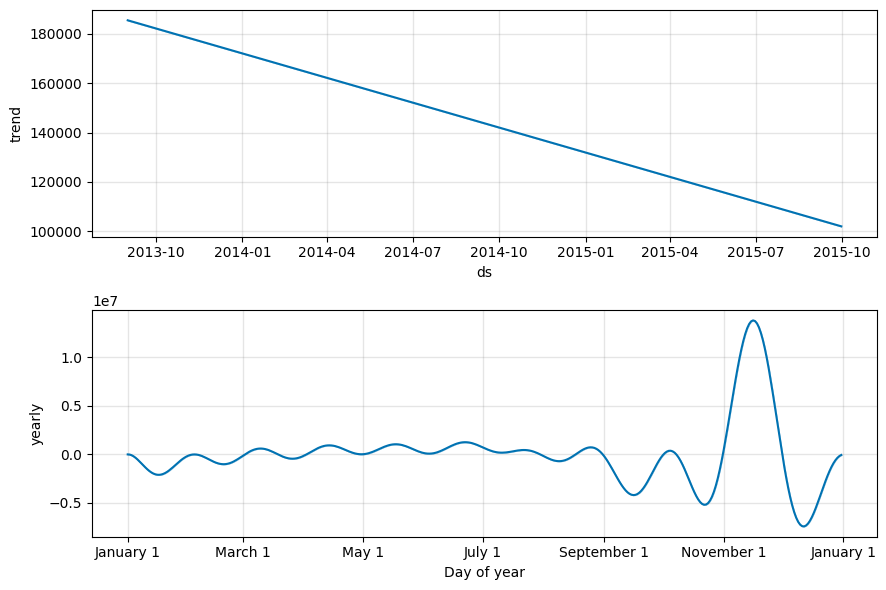

In [23]:
plt2 = m.plot_components(forecast)

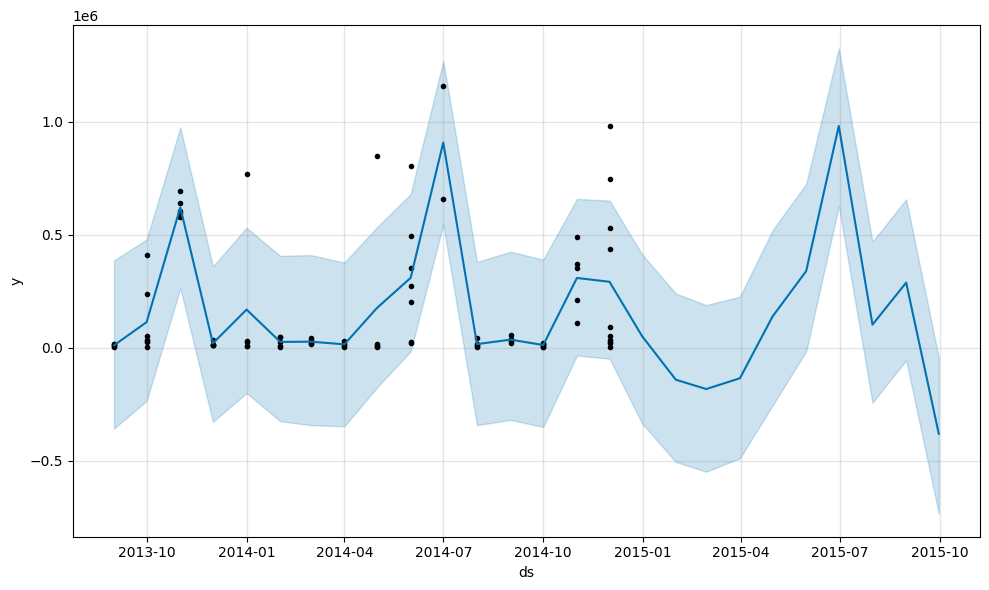

In [24]:
plot1 = m.plot(forecast)